<a href="https://colab.research.google.com/github/ZorroHZR/schulich_ds1/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Report Deep Learning Models for Image Classification on the Stanford Dog Dataset
##1. Data Preprocessing
In this project, I aim to build a deep-learning model for recognizing 120 dog breeds. This is a challenging classification problem because the differences between some dog breeds are minimal. By solving this problem, I aim to deepen my understanding of deep learning and image classification and develop a tool that can be used in real-world applications.
The dataset I used contains about 10,000 images of dogs, with about 80 images of each breed. These images are collected from the web and vary in size and colour. For my model to process these images, I performed a series of preprocessing steps, including resizing the images, normalizing the pixel values, and converting the labels to one-bit valid encoding.
For the model design, I chose to base the model on the pre-trained ResNet50 model, which has been trained on many images and can extract many high-level features. I added some fully connected layers on top of this model so that the model could learn more specific features related to the dog breed.

I used the Adam optimizer and the categorical cross-entropy loss function during training and set the learning rate to 0.001. I also used strategies such as early stopping and dropout to prevent overfitting.
##2. Data preprocessing
For this project, I used a dataset containing multiple dog breeds. Each breed has multiple images with different sizes and colours. In order for my model to be able to process these images, I need to preprocess the data.
First, I read all the images and converted them to RGB format. This step was necessary because my model needed colour images as input. I used TensorFlow's map function to do this.
Then, I resized all the images to the same size (e.g., 224x224 pixels). The neural network needs all the inputs to have the same shape. I used TensorFlow's resize function to accomplish this.
Next, I normalized the pixel values of the image. Normalization helps my model converge faster and improves the model's performance. I converted the pixel values from 0-255 integers to floating point numbers between 0-1.
Finally, I converted the dataset's labels (a.k.a. dog breeds) to one-hot encoding. One-hot encoding is commonly used to represent categories, allowing my model to learn the differences between categories more easily.
These preprocessing steps are very important and help my model understand and learn the data better. When performing these steps, I need to ensure that I have performed the same preprocessing on both my training and test sets to ensure the model works properly on both datasets.
##3. Model Construction
My model is built based on a pre-trained ResNet50 model, a deep neural network model trained on many images and learned many general and advanced features. By using this pre-trained model, I can take advantage of these already-learned features, thus reducing the training I need to do from scratch.
On top of the ResNet50 model, I added a global average pooling layer. This layer compresses each feature map into a single value, significantly reducing the number of parameters in the model and thus reducing the risk of overfitting.
I then added two fully connected layers and an output layer. The fully connected layer was used to learn the complex relationships between features further, and the output layer was used to convert the final feature vectors into my target categories. The fully connected layer and the output layer use ReLU as an activation function because the ReLU function helps my model learn nonlinear decision boundaries. In addition, my weights are initialized with a random normal distribution because this initialization has been shown to give good results in many cases.
##4. model training
I compile the model with the Adam optimizer and the categorical cross-entropy loss function. The Adam optimizer is a commonly used optimizer that automatically adjusts the learning rate, thus helping me train the model faster. The Categorical Cross Entropy Loss Function is a commonly used loss function that measures the gap between my predictions and the actual labels.
I set the learning rate to 0.001. this is a relatively common value, but I experimented with other values to find the optimal learning rate.
The model was trained for ten cycles on the training set and also validated on the test set. This was to monitor the model's performance on unseen data so that overfitting issues could be detected and dealt with promptly.
During the training process, I also experimented with different numbers of nodes and learning rates to find the optimal model structure and parameters. This is an iterative process that requires several trials and adjustments.
##5. Results analysis and model evaluation
During model training, I recorded the training and validation accuracies at the end of each training cycle. These data help me understand the learning curve of the model and whether the model is overfitting (i.e., performing much better on the training set than on the validation set). At the end of all training cycles, I evaluate the model on the test set. This helps me understand how the model performs on unseen data, i.e., the model's ability to generalize.
I also generated a confusion matrix to gain a deeper understanding of the model's performance. The confusion matrix is a standard tool for evaluating the performance of a classification model that shows the number of correct predictions and incorrect predictions made by the model in each category. With the confusion matrix, I can see which categories the model performs better and which categories it performs worse. This helps me identify the model's weaknesses so that I can improve it in my subsequent work.
For example, suppose the model makes an unusually high number of false predictions on specific categories. In that case, I can scrutinize the training data for those categories to see any quality issues (e.g., mislabeling, sample imbalance, etc.). I can employ strategies to improve the model's performance in these categories, such as increasing the training samples, using data augmentation, etc. In my code, I use the heatmap function of the Seaborn library to visualize the confusion matrix. It allows me to visualize the performance of the model in each category in a more intuitive way.
##6.Summary and future work
In this project, I successfully built a deep-learning model for recognizing 120 different dog breeds. The model I used was based on a pre-trained ResNet50 model with a series of tweaks and optimizations. While my model achieved good results on the training set, there is still room to improve its performance on the validation set.
Specifically, I plan to try more complex model structures or use more advanced training strategies to improve the accuracy and generalization of the model further. For example, I may use deeper neural networks or new training techniques such as model integration, learning rate decay, etc. On the other hand, I also intend to analyze the confusion matrix more deeply to understand the categories in which the model makes errors. This can help me identify the model's weaknesses and adjust the model or add more targeted training.
Additionally, I need to take into account computational resources. For this project, I ran all the code on Google Colab. Although Google Colab provides a convenient cloud computing environment, it also requires a relatively high cost. For example, the cheapest version costs 13.99 CAD per month. While using cloud computing saves on local computing resources and often provides faster computing speeds, its high cost is also an issue to consider.
In contrast, other development environments such as Jupyter Notebook or VS Code, while they may run slower, are cheaper and better suited for individual users or smaller projects. However, these environments may face time and resource challenges when dealing with large-scale or complex tasks.
I also need to find a balance between computational efficiency and cost. I may explore some new optimization techniques to reduce the computational requirements of my model, thus making my model more suitable to run in resource-constrained environments without sacrificing performance.
Overall, although my model has achieved some results, there are still many areas that can be improved and explored in depth. I look forward to further enhancing my model in future work and finding more efficient and economical computational methods.


###Import Necessary Libraries###
---
Import Sequential model, Conv2D most using into image.





In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Flatten, Dense, Dropout

#Load Dataset

- Load Data: http://vision.stanford.edu/aditya86/ImageNetDogs/main.html

- Number of breeds dog: 120

- Number of Images: 20580


In [ ]:
(ds_train, ds_test), ds_info = tfds.load('stanford_dogs',split=['train', 'test'],with_info=True,as_supervised=True,)

print(ds_info)

tfds.core.DatasetInfo(
    name='stanford_dogs',
    full_name='stanford_dogs/0.2.0',
    description="""
    The Stanford Dogs dataset contains images of 120 breeds of dogs from around the
    world. This dataset has been built using images and annotation from ImageNet for
    the task of fine-grained image categorization. There are 20,580 images, out of
    which 12,000 are used for training and 8580 for testing. Class labels and
    bounding box annotations are provided for all the 12,000 images.
    """,
    homepage='http://vision.stanford.edu/aditya86/ImageNetDogs/main.html',
    data_dir='/root/tensorflow_datasets/stanford_dogs/0.2.0',
    file_format=tfrecord,
    download_size=778.12 MiB,
    dataset_size=744.72 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=120),
        'objects': Sequence({
            'bbox': B

## Load the Stanford Dog Dataset and Information

From the dataset described, we know that the Stanford Dogs dataset comprises 20,580 images of 120 dog breeds worldwide. The dataset was created using images and annotations from ImageNet to aid in fine-grained image categorization. The dataset is divided into 12,000 images used for training and 8,580 images used for testing. Class labels and bounding box annotations are provided for all 12,000 images to aid in their categorization.


## Data visualization


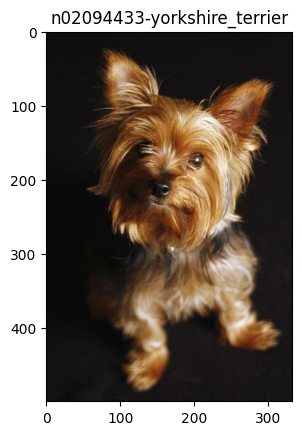

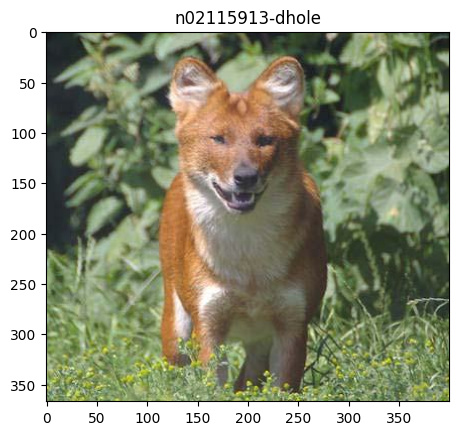

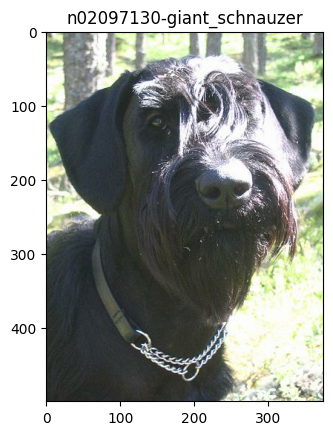

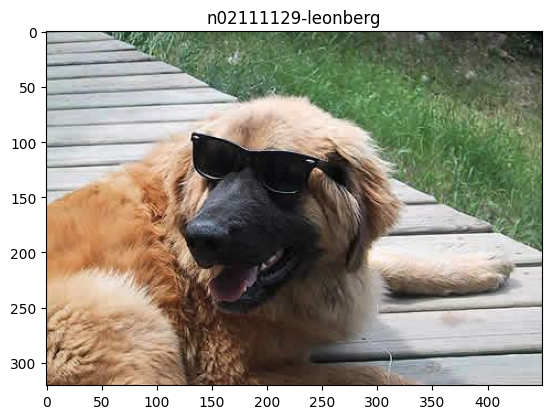

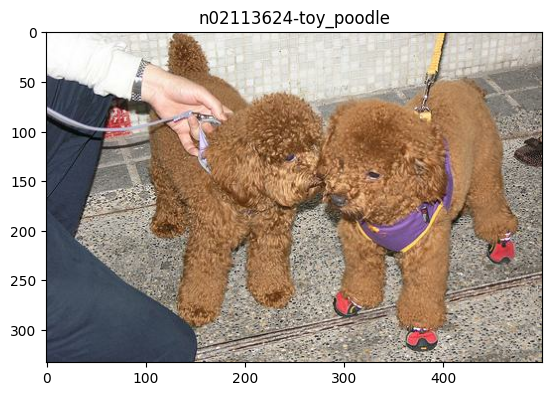

In [ ]:
for image, label in ds_train.take(5):
    plt.figure()
    plt.imshow(image.numpy())
    plt.title(ds_info.features['label'].int2str(label))
    plt.show()

##Data Processing
Based on the question and research purpose, I will resize the image to 224 x 224 pixels; I do some research for further steps. For example, the CNN model will be more suitable for the 224 x 224 pixels format. It might be easy to train the model. Moreover, the 224 x 224 pixel is more suitable for ImageNet. A lot of models and techniques are based on this format. However, the other model might use different pixel formats to find optimal efficiency and balance points.

In [ ]:
def onehot_encoding(label):
    return tf.one_hot(label, depth=120)

def preprocess_image(image):
    # Data augmentation to the training dataset
    image = tf.image.resize(image, [224, 224])  # resize the image
    image = tf.image.random_flip_left_right(image)  # flip the image
    image = tf.image.random_brightness(image, max_delta=0.3)  # adjust the brightness of image
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)  # adjust the contrast
    image = tf.image.rgb_to_grayscale(image)  # Convert the image to grayscale
    image = image / 255.0  # Normalize the pixel values
    return image

def preprocess(image, label):
    image = preprocess_image(image)
    label = onehot_encoding(label)  # Use the onehot_encoding function here
    image.set_shape([224, 224, 1])
    label.set_shape([120])
    return image, label

ds_train = ds_train.map(preprocess)
ds_test = ds_test.map(preprocess)

In [ ]:
# Model Building
from tensorflow.keras import layers

## Modeling build up ##
---

In [ ]:
def simple_cnn_model(initializer, activation='relu'):
    return tf.keras.models.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation, input_shape=(224, 224, 1), kernel_initializer=initializer),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation, kernel_initializer=initializer),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation=activation, kernel_initializer=initializer),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation=activation, kernel_initializer=initializer),
        layers.Dropout(0.5),
        layers.Dense(64, activation=activation, kernel_initializer=initializer),
        layers.Dropout(0.5),
        layers.Dense(1204, activation=activation, kernel_initializer=initializer),
        layers.Dropout(0.5),
        layers.Dense(120, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())
    ])

In [ ]:
initializer = 'he_normal'
model = simple_cnn_model(initializer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
for images, labels in ds_train.take(1):
    print(images.shape, labels.shape)

(224, 224, 1) (120,)


In [ ]:
batch_size = 32
ds_train = ds_train.batch(batch_size)
ds_test = ds_test.batch(batch_size)

In [ ]:
init = tf.keras.initializers.GlorotNormal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_zeros = simple_cnn_model(init, activate)
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(ds_train, epochs=10, validation_data=ds_test)


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
375/375 [==============================] - 29s 65ms/step - loss: 4.7885 - accuracy: 0.0078 - val_loss: 4.7874 - val_accuracy: 0.0077
Epoch 2/10
375/375 [==============================] - 24s 63ms/step - loss: 4.7879 - accuracy: 0.0077 - val_loss: 4.7875 - val_accuracy: 0.0101
Epoch 3/10
375/375 [==============================] - 23s 62ms/step - loss: 4.7877 - accuracy: 0.0082 - val_loss: 4.7875 - val_accuracy: 0.0077
Epoch 4/10
375/375 [==============================] - 24s 63ms/step - loss: 4.7877 - accuracy: 0.0088 - val_loss: 4.7874 - val_accuracy: 0.0085
Epoch 5/10
375/375 [==============================] - 24s 63ms/step - loss: 4.7878 - accuracy: 0.0080 - val_loss: 4.7873 - val_accuracy: 0.0112
Epoch 6/10
375/375 [==============================] - 24s 63ms/step - loss: 4.7877 - accuracy: 0.0070 - val_loss: 4.7874 - val_accuracy: 0.0125
Epoch 7/10
375/375 [==============================] - 23s 62ms/step - loss: 4.7878 - accuracy: 0.0079 - val_loss: 4.7873 - val_accuracy:

In [ ]:
def convert_to_color(images, labels):
    images = tf.image.grayscale_to_rgb(images)
    return images, labels

ds_train = ds_train.map(convert_to_color)
ds_test = ds_test.map(convert_to_color)

In [ ]:
!pip install keras

In [ ]:
import keras
import keras.layers as layers

# Build model
base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# add layer
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(120, activation='softmax')(x)


model1 = keras.Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = True

# optimizer using adam
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# train model and set epochs 10
model1.fit(ds_train, epochs=10, batch_size=3200, validation_data=ds_test)

Epoch 1/10
375/375 [==============================] - 67s 95ms/step - loss: 4.5497 - accuracy: 0.0283 - val_loss: 5.3758 - val_accuracy: 0.0139
Epoch 2/10
375/375 [==============================] - 34s 91ms/step - loss: 3.8372 - accuracy: 0.0846 - val_loss: 5.7104 - val_accuracy: 0.0157
Epoch 3/10
375/375 [==============================] - 34s 91ms/step - loss: 3.2806 - accuracy: 0.1662 - val_loss: 4.8138 - val_accuracy: 0.0693
Epoch 4/10
375/375 [==============================] - 34s 92ms/step - loss: 2.8417 - accuracy: 0.2441 - val_loss: 4.2474 - val_accuracy: 0.0879
Epoch 5/10
375/375 [==============================] - 34s 91ms/step - loss: 2.4803 - accuracy: 0.3147 - val_loss: 3.8496 - val_accuracy: 0.1533
Epoch 6/10
375/375 [==============================] - 34s 92ms/step - loss: 2.1397 - accuracy: 0.3910 - val_loss: 4.2407 - val_accuracy: 0.1685
Epoch 7/10
375/375 [==============================] - 34s 91ms/step - loss: 1.8342 - accuracy: 0.4638 - val_loss: 4.4712 - val_accuracy:

In [ ]:

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(2048, activation='relu', kernel_initializer='random_normal')(x)
x = layers.Dense(1024, activation='relu', kernel_initializer='random_normal')(x)
predictions = layers.Dense(120, activation='softmax', kernel_initializer='random_normal')(x)


model2 = keras.Model(inputs=base_model.input, outputs=predictions)


optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


history = model1.fit(ds_train, epochs=10, batch_size=3200, validation_data=ds_test)

#Evalutaion
final_train_accuracy = history.history['accuracy'][-1]
print("Final training accuracy: ", final_train_accuracy)

final_val_accuracy = history.history['val_accuracy'][-1]
print("Final validation accuracy: ", final_val_accuracy)

Epoch 1/10
375/375 [==============================] - 65s 94ms/step - loss: 0.6607 - accuracy: 0.7981 - val_loss: 2.5834 - val_accuracy: 0.3956
Epoch 2/10
375/375 [==============================] - 34s 91ms/step - loss: 0.4197 - accuracy: 0.8791 - val_loss: 2.6412 - val_accuracy: 0.4112
Epoch 3/10
375/375 [==============================] - 34s 92ms/step - loss: 0.3089 - accuracy: 0.9150 - val_loss: 2.8338 - val_accuracy: 0.4118
Epoch 4/10
375/375 [==============================] - 34s 91ms/step - loss: 0.2180 - accuracy: 0.9482 - val_loss: 2.9772 - val_accuracy: 0.4159
Epoch 5/10
375/375 [==============================] - 34s 91ms/step - loss: 0.1598 - accuracy: 0.9628 - val_loss: 3.1057 - val_accuracy: 0.4169
Epoch 6/10
375/375 [==============================] - 34s 91ms/step - loss: 0.1065 - accuracy: 0.9793 - val_loss: 3.3294 - val_accuracy: 0.4205
Epoch 7/10
375/375 [==============================] - 34s 92ms/step - loss: 0.0755 - accuracy: 0.9868 - val_loss: 3.5715 - val_accuracy:

In [ ]:
y_true = [y.numpy() for x, y in ds_test.unbatch()]
y_true = np.argmax(y_true, axis=1)

269/269 [==============================] - 11s 38ms/step


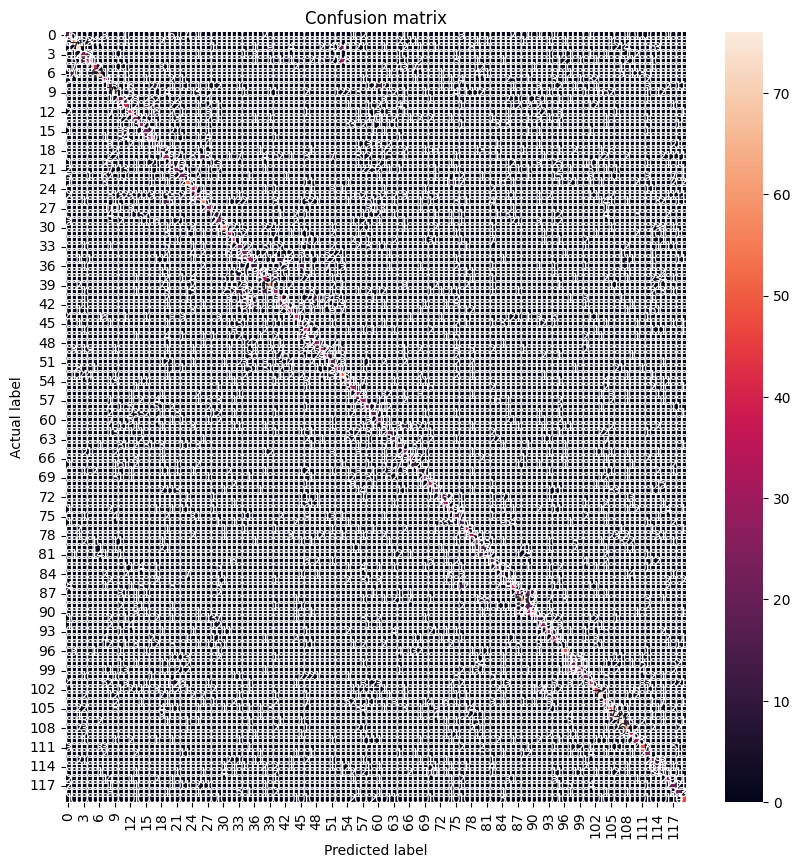

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


y_true = np.concatenate([y for x, y in ds_test], axis=0)
y_true = np.argmax(y_true, axis=1)


y_pred = model1.predict(ds_test)
y_pred_classes = np.argmax(y_pred, axis=1)


cm = confusion_matrix(y_true, y_pred_classes)


plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()